In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def lstsq(set_num, filename, xlow, xhigh, ylow, yhigh, lambd_val): 
    # Load in the data and put into array
    data1 = pd.read_csv(str(filename), header=None)
    x1 = np.array(data1.iloc[:,0])
    y1 = np.array(data1.iloc[:,1])
    print('Data Set ', set_num)

    # Create a column of 1's for the x0 column, and x2, x3 columns
    x0 = np.ones(shape=(len(x1)))
    x2 = x1**2
    x3 = x1**3
    data1_temp = np.stack((x0,x1,x2,x3,y1), axis=1)
    # Calculate mean for each column
    mean1 = data1_temp.mean(axis=0) 
    # Center around mean for each column
    data1_temp -= data1_temp.mean(axis=0)

    # Add it to the matrix
    data1_temp2 = np.stack((x0,x1,x2,x3,y1), axis=1)
    X1 = np.stack((x0,x1,x2,x3), axis=1)
    
    
    #########################################################################
    ## LINEAR LEAST SQUARES
    # Calculate the linear least squares optimization parameters theta0 and theta1 and print the model
    XTX1_inv = np.linalg.inv(X1.T @ X1)
    XTY1 = X1.T @ y1
    theta1 = XTX1_inv @ XTY1
    print('\nLinear Least Squares\nTheta values:\n', theta1)
    print('Line:\ny = ', theta1[3], 'x^3 + ', theta1[2], 'x^2 +', theta1[1], 'x + ', theta1[0])
    # Create another plot of the dataset and plot the model 
    p2 = plt.figure()
    plt.plot(x1,y1, '.')
    plt.xlim(xlow, xhigh)
    plt.ylim(ylow, yhigh)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Least Squares Line (Black), Ridge Regression (Red)')
    plt.gca().set_aspect('equal',adjustable='box')
    ypred = theta1[0] + theta1[1]*x1 + theta1[2]*x2 + theta1[3]*x3
    plt.plot(x1, ypred, 'k.')
    
    
    #########################################################################
    ## RIDGE REGRESSION
    print('\nRidge Regression')
    # Mean center the data first
    x0_t = data1_temp[:,0]
    x1_t = data1_temp[:,1]
    x2_t = data1_temp[:,2]
    x3_t = data1_temp[:,3]
    y1_t = data1_temp[:,4]
    X1 = np.stack((x0_t,x1_t,x2_t, x3_t), axis=1)
    XTY1 = X1.T @ y1_t

    XTX = X1.T @ X1
    tsize = XTX.shape
    I = np.identity(tsize[1])
    lambd = np.ones(shape=(tsize[1]))*lambd_val
    product = (np.linalg.inv(XTX + I*lambd)) @ XTY1
    
    # Plot the line for ridge regression
    plt.gca().set_aspect('equal',adjustable='box')
    plt.plot(x1, product[0] + product[1]*x1 + product[2]*x2 + product[3]*x3, 'r.')
    print('Theta values:\n', product)
    print('Ridge Regression Line:\ny = ', product[3], 'x^3 +', product[2], 'x^2 +', product[1], 'x + ', product[0])

Data Set  1

Linear Least Squares
Theta values:
 [ 1.08048274e+01  4.98753079e-01 -4.35324037e-04 -1.91508368e-06]
Line:
y =  -1.9150836796879816e-06 x^3 +  -0.00043532403661367515 x^2 + 0.49875307883033826 x +  10.804827434475074

Ridge Regression
Theta values:
 [ 0.00000000e+00  4.98731440e-01 -4.35337891e-04 -1.91237151e-06]
Ridge Regression Line:
y =  -1.912371508569019e-06 x^3 + -0.0004353378912315606 x^2 + 0.4987314400541029 x +  0.0


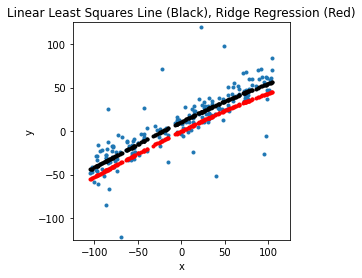

In [2]:
# Dataset 1 Small Lambda
lstsq(1, "data1.csv", -125, 125, -125, 125, 5)

Data Set  1

Linear Least Squares
Theta values:
 [ 1.08048274e+01  4.98753079e-01 -4.35324037e-04 -1.91508368e-06]
Line:
y =  -1.9150836796879816e-06 x^3 +  -0.00043532403661367515 x^2 + 0.49875307883033826 x +  10.804827434475074

Ridge Regression
Theta values:
 [ 0.00000000e+00  5.74571408e-04 -7.21775346e-04  6.05497490e-05]
Ridge Regression Line:
y =  6.054974897621932e-05 x^3 + -0.000721775346176206 x^2 + 0.0005745714081638033 x +  0.0


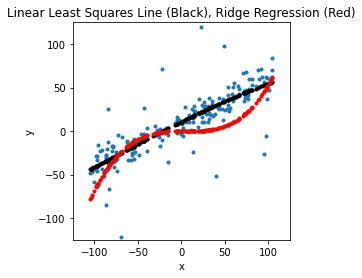

In [3]:
# Dataset 1 Large Lambda
lstsq(1, "data1.csv", -125, 125, -125, 125, 100000000)

Data Set  2

Linear Least Squares
Theta values:
 [1.30204127e+01 2.23547330e-01 6.99986034e-05 1.32351941e-05]
Line:
y =  1.3235194077975192e-05 x^3 +  6.999860342831279e-05 x^2 + 0.22354733000795257 x +  13.020412734609016

Ridge Regression
Theta values:
 [0.00000000e+00 2.23538852e-01 7.00029384e-05 1.32362429e-05]
Ridge Regression Line:
y =  1.3236242948095098e-05 x^3 + 7.000293842879409e-05 x^2 + 0.223538851852941 x +  0.0


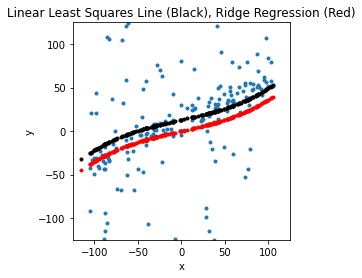

In [4]:
# Dataset 2 Small Lambda
lstsq(2, "data2.csv", -125, 125, -125, 125, 5)

Data Set  2

Linear Least Squares
Theta values:
 [1.30204127e+01 2.23547330e-01 6.99986034e-05 1.32351941e-05]
Line:
y =  1.3235194077975192e-05 x^3 +  6.999860342831279e-05 x^2 + 0.22354733000795257 x +  13.020412734609016

Ridge Regression
Theta values:
 [0.00000000e+00 2.60381654e-02 1.70913128e-04 3.76698520e-05]
Ridge Regression Line:
y =  3.7669852037550595e-05 x^3 + 0.0001709131281525055 x^2 + 0.026038165440737168 x +  0.0


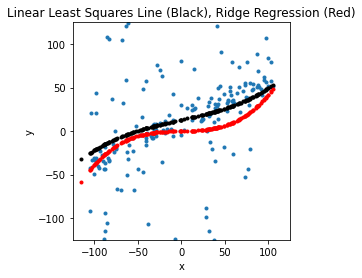

In [5]:
# Dataset 2 Large Lambda
lstsq(2, "data2.csv", -125, 125, -125, 125, 1000000)

Data Set  3

Linear Least Squares
Theta values:
 [ 1.34386980e+00  3.54550766e-01  1.88000156e-03 -8.03707463e-06]
Line:
y =  -8.037074627589604e-06 x^3 +  0.0018800015604961313 x^2 + 0.35455076604553354 x +  1.343869795645066

Ridge Regression
Theta values:
 [ 0.00000000e+00  3.54550669e-01  1.88000156e-03 -8.03707065e-06]
Ridge Regression Line:
y =  -8.03707065187337e-06 x^3 + 0.0018800015609799442 x^2 + 0.3545506686147222 x +  0.0


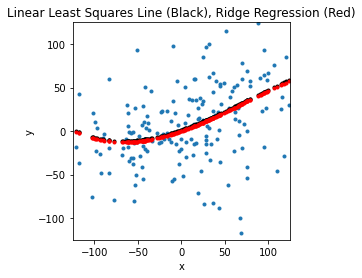

In [6]:
# Dataset 3 Small Lambda
lstsq(3, "data3.csv", -125, 125, -125, 125, 0.1)

Data Set  3

Linear Least Squares
Theta values:
 [ 1.34386980e+00  3.54550766e-01  1.88000156e-03 -8.03707463e-06]
Line:
y =  -8.037074627589604e-06 x^3 +  0.0018800015604961313 x^2 + 0.35455076604553354 x +  1.343869795645066

Ridge Regression
Theta values:
 [0.00000000e+00 1.29070441e-05 9.99129099e-04 6.91069216e-06]
Ridge Regression Line:
y =  6.910692159435217e-06 x^3 + 0.0009991290992192108 x^2 + 1.2907044117224729e-05 x +  0.0


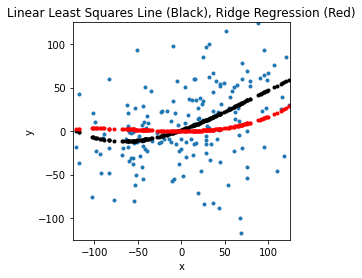

In [10]:
#Dataset 3 Large Lambda
lstsq(3, "data3.csv", -125, 125, -125, 125, 10000000000)

Data Set  4

Linear Least Squares
Theta values:
 [ 1.01157101  0.20151784 -0.87303271  0.19023363]
Line:
y =  0.1902336250569867 x^3 +  -0.8730327140616652 x^2 + 0.20151783895224185 x +  1.011571007446399

Ridge Regression
Theta values:
 [ 0.         -0.24944978 -0.43589341  0.09558863]
Ridge Regression Line:
y =  0.09558863237794246 x^3 + -0.435893407062915 x^2 + -0.24944977668727386 x +  0.0


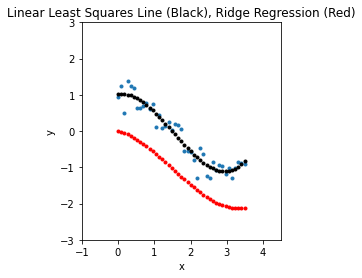

In [8]:
# Dataset 4 Small Lambda
lstsq(4, "data4.csv", -1, 4.5, -3, 3, 5)

Data Set  4

Linear Least Squares
Theta values:
 [ 1.01157101  0.20151784 -0.87303271  0.19023363]
Line:
y =  0.1902336250569867 x^3 +  -0.8730327140616652 x^2 + 0.20151783895224185 x +  1.011571007446399

Ridge Regression
Theta values:
 [ 0.         -0.06220082 -0.10103091 -0.01678181]
Ridge Regression Line:
y =  -0.016781806160207052 x^3 + -0.1010309066319236 x^2 + -0.06220081573497993 x +  0.0


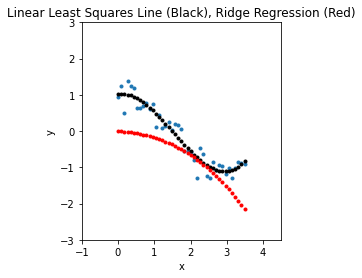

In [9]:
# Dataset 4 Large Lambda
lstsq(4, "data4.csv", -1, 4.5, -3, 3, 100)